# NASA CMAPSS Machine Learning Task

Dataset Overview 

Dataset Source : [NASA CMAPSS Dataset on 
Kaggle](https://www.kaggle.com/datasets/behrad3d/nasacmaps) 

Description : The CMAPSS dataset contains engine degradation simulation data, designed 
for predictive maintenance modeling. It provides sensor data and operational conditions for 
turbofan engines. 

Tasks 

1. Exploratory Data Analysis (EDA) 
Objective : Identify meaningful patterns and specific insights from the dataset. 
 
1.Understand the distribution of sensor readings and operational conditions. 
2.Analyze the trend of degradation patterns over time. 
3.Investigate correlations between sensor data and engine degradation. 
4.Detect anomalies or outliers in the dataset. 

2. Feature Engineering 

Objective : Identify and create features that enhance model performance. 
1.Evaluate the importance of existing features (e.g., sensor data, operational conditions). 
2.Generate additional features: 
3.Cumulative degradation indicators. 
4.Rolling averages or windowbased aggregations for sensor values. 
5.Derived metrics from sensor data and operational conditions. 
6.Handle missing data and scale/normalize features appropriately. 

3. Model Development and Evaluation 

Objective : Train and evaluate predictive maintenance models. 
Model Selection : Consider multiple algorithms such as: 
 
1.Linear Regression (for baseline). 
2.Gradient Boosting (e.g., XGBoost, LightGBM). 
3.Neural Networks for complex patterns. 
4.Evaluation Metrics : 

*Root Mean Squared Error (RMSE). 
*Mean Absolute Error (MAE). 
*Rsquared (for regression models). 
 *Precision, Recall, F1score (for classification models, if applicable). 

Expected Deliverables 
  
1.EDA Insights: 
Visualizations (e.g., trend charts, correlation matrices). 
Key findings (e.g., which sensors are most indicative of engine degradation). 

2.Engineered Features: 
List of selected features. 
Description of newly created features and their significance. 

3.Model Results: 
Model training and testing performance. 
Comparison of different models. 
Key metrics for the bestperforming model.

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
X = pd.read_csv("x_labels_with_data.csv")
X

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265251,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,130.87,2388.50,8112.61,9.4427,0.02,331,2212,100.0,10.53,6.2620
265252,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,314.51,2388.33,8086.83,9.2772,0.02,366,2324,100.0,24.33,14.6486
265253,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,182.76,2388.64,8100.84,9.3982,0.02,336,2223,100.0,14.69,8.8389
265254,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,314.17,2388.37,8085.24,9.2727,0.03,366,2324,100.0,24.44,14.6887


In [5]:
y = pd.read_csv("y_labels_with_data.csv")
y

,value
0,22
1,39
2,107
3,75
4,149
...,...
702,122
703,191
704,56
705,131


In [11]:
# Rename 'value' column in y to match with X for easier merging
y.rename(columns={'value': 'degradation'}, inplace=True)

In [32]:
# Display the column names of the dataset
print("Columns in X dataset:", X.columns)
print("Columns in y dataset:", y.columns)

Columns in X dataset: Index(['unit_number', 'time_in_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21'],
      dtype='object')
Columns in y dataset: Index(['degradation'], dtype='object')


In [33]:
# Merge the X and y datasets
data = X.copy()
data['degradation'] = y['degradation']  # Ensure the 'degradation' column is added

# Check the columns after merging
print("Columns in merged dataset:", data.columns)

# Generate cumulative degradation feature
data['cumulative_degradation'] = data.groupby('unit_number')['degradation'].cumsum()

# Display the updated dataset
print(data[['unit_number', 'time_in_cycles', 'degradation', 'cumulative_degradation']].head())


Columns in merged dataset: Index(['unit_number', 'time_in_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'degradation'],
      dtype='object')
   unit_number  time_in_cycles  degradation  cumulative_degradation
0            1               1         22.0                    22.0
1            1               2         39.0                    61.0
2            1               3        107.0                   168.0
3            1               4         75.0                   243.0
4            1               5        149.0                   392.0


In [13]:
# Display dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265256 entries, 0 to 265255
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   unit_number            265256 non-null  int64  
 1   time_in_cycles         265256 non-null  int64  
 2   operational_setting_1  265256 non-null  float64
 3   operational_setting_2  265256 non-null  float64
 4   operational_setting_3  265256 non-null  float64
 5   sensor_1               265256 non-null  float64
 6   sensor_2               265256 non-null  float64
 7   sensor_3               265256 non-null  float64
 8   sensor_4               265256 non-null  float64
 9   sensor_5               265256 non-null  float64
 10  sensor_6               265256 non-null  float64
 11  sensor_7               265256 non-null  float64
 12  sensor_8               265256 non-null  float64
 13  sensor_9               265256 non-null  float64
 14  sensor_10      

In [14]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
unit_number                   0
time_in_cycles                0
operational_setting_1         0
operational_setting_2         0
operational_setting_3         0
sensor_1                      0
sensor_2                      0
sensor_3                      0
sensor_4                      0
sensor_5                      0
sensor_6                      0
sensor_7                      0
sensor_8                      0
sensor_9                      0
sensor_10                     0
sensor_11                     0
sensor_12                     0
sensor_13                     0
sensor_14                     0
sensor_15                     0
sensor_16                     0
sensor_17                     0
sensor_18                     0
sensor_19                     0
sensor_20                     0
sensor_21                     0
degradation              264549
dtype: int64


In [7]:

# Check data types
print(X.dtypes)
print(y.dtypes)

unit_number                int64
time_in_cycles             int64
operational_setting_1    float64
operational_setting_2    float64
operational_setting_3    float64
sensor_1                 float64
sensor_2                 float64
sensor_3                 float64
sensor_4                 float64
sensor_5                 float64
sensor_6                 float64
sensor_7                 float64
sensor_8                 float64
sensor_9                 float64
sensor_10                float64
sensor_11                float64
sensor_12                float64
sensor_13                float64
sensor_14                float64
sensor_15                float64
sensor_16                float64
sensor_17                  int64
sensor_18                  int64
sensor_19                float64
sensor_20                float64
sensor_21                float64
dtype: object
value    int64
dtype: object


In [15]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
         unit_number  time_in_cycles  operational_setting_1  \
count  265256.000000   265256.000000          265256.000000   
mean      104.590965      112.288337              17.224563   
std        72.288716       81.173106              16.528816   
min         1.000000        1.000000              -0.008700   
25%        44.000000       48.000000               0.001300   
50%        89.000000       99.000000              19.998200   
75%       163.000000      160.000000              35.001500   
max       260.000000      543.000000              42.008000   

       operational_setting_2  operational_setting_3       sensor_1  \
count          265256.000000          265256.000000  265256.000000   
mean                0.410353              95.733933     485.821285   
std                 0.367993              12.346819      30.422878   
min                -0.000600              60.000000     445.000000   
25%                 0.000200             100.000000     449.4

<Figure size 2000x1500 with 0 Axes>

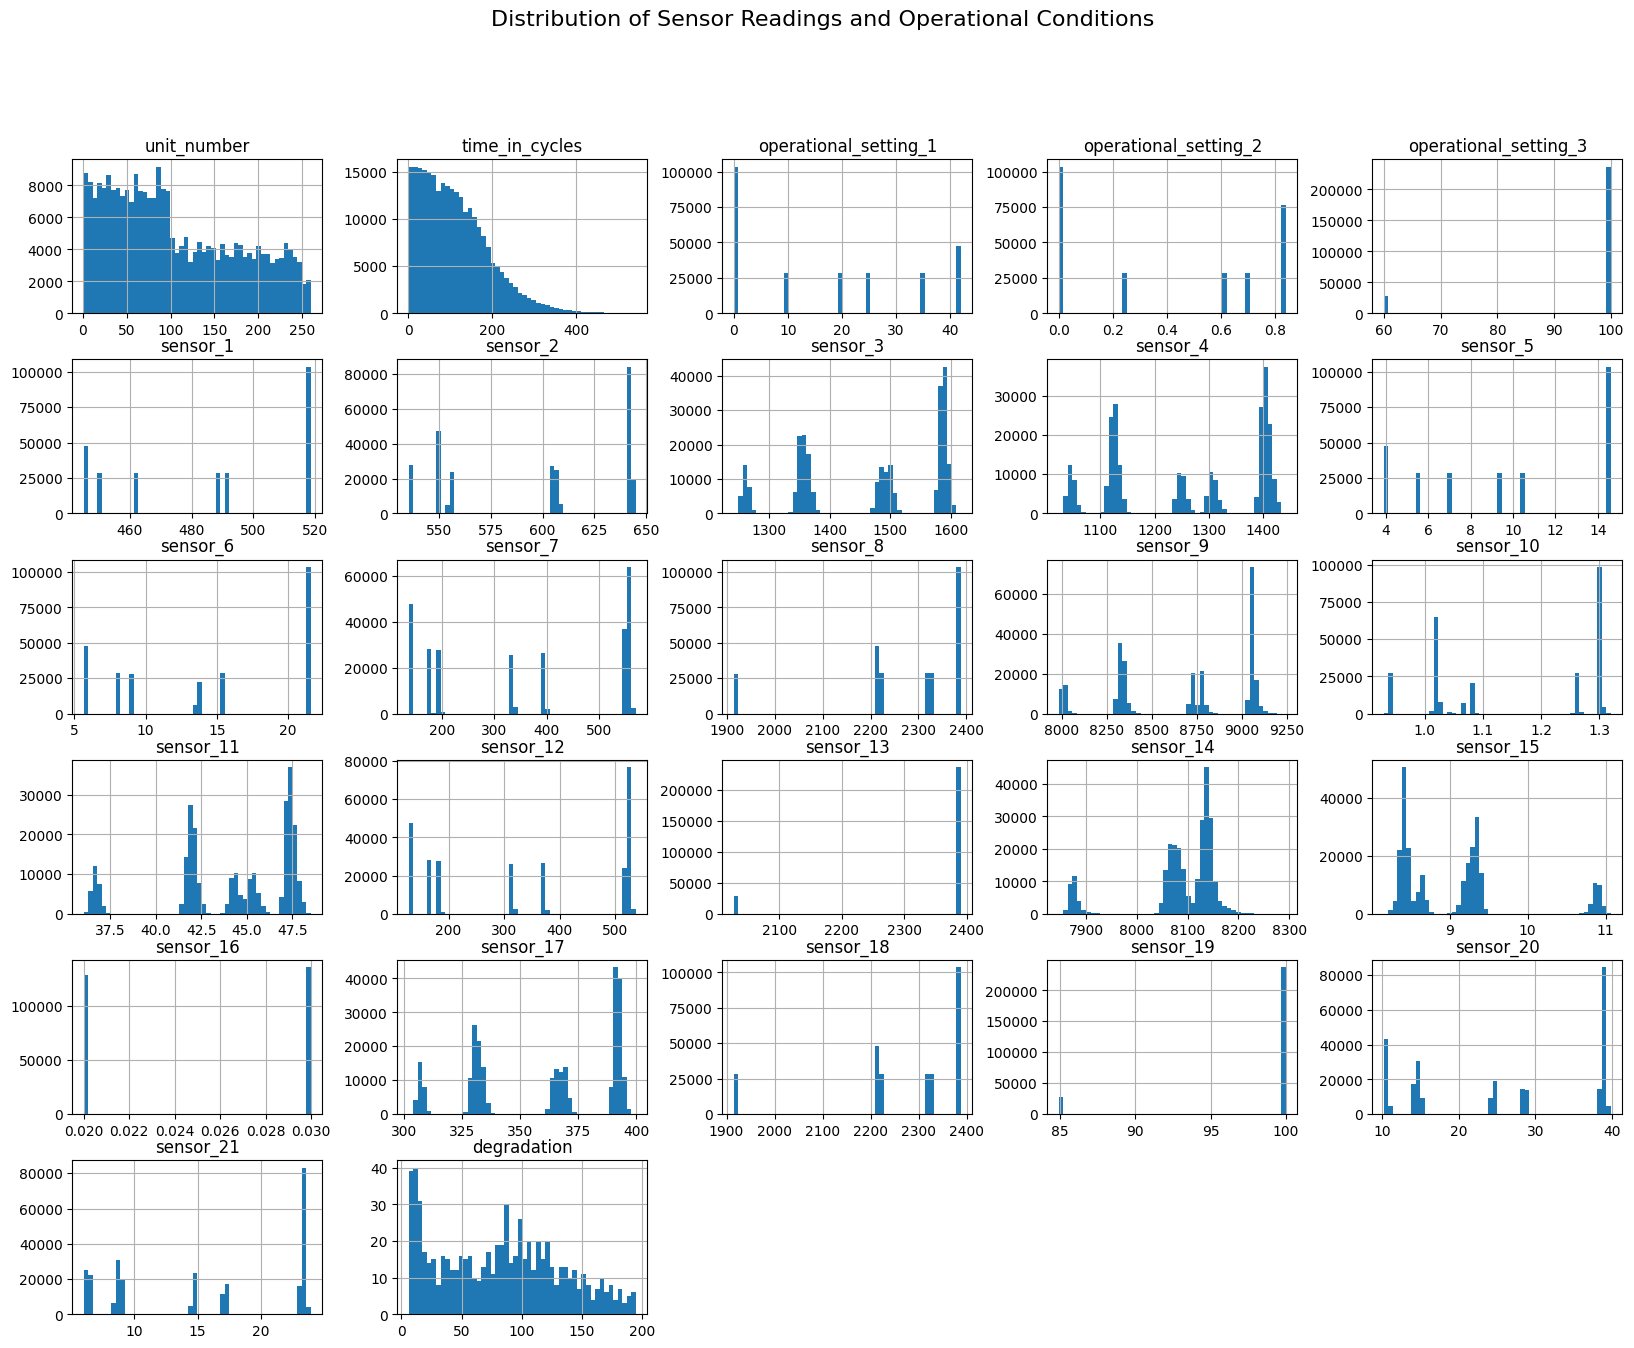

In [16]:
# 1. Distribution of Sensor Readings and Operational Conditions
plt.figure(figsize=(20, 15))
data.hist(bins=50, figsize=(20, 15))
plt.suptitle('Distribution of Sensor Readings and Operational Conditions', fontsize=16)
plt.show()

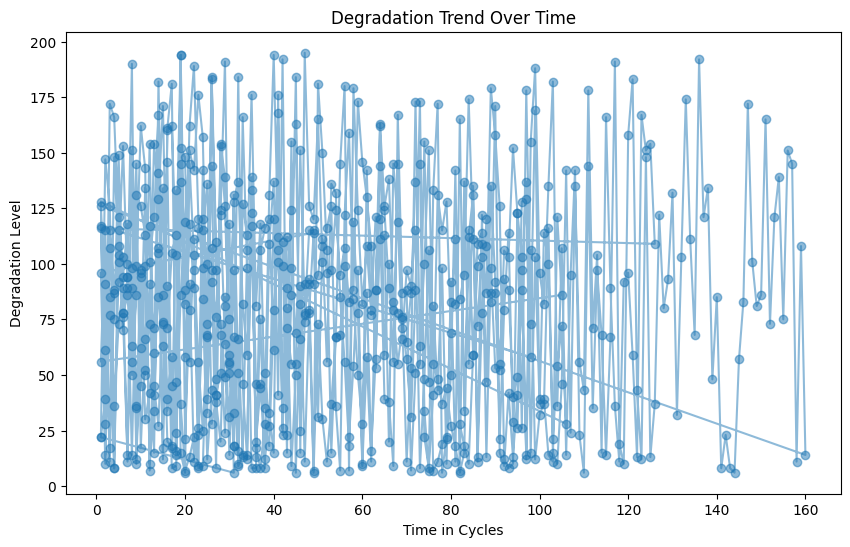

In [17]:
# 2. Analyzing the trend of degradation patterns over time
plt.figure(figsize=(10, 6))
plt.plot(data['time_in_cycles'], data['degradation'], alpha=0.5, linestyle='-', marker='o')
plt.title('Degradation Trend Over Time')
plt.xlabel('Time in Cycles')
plt.ylabel('Degradation Level')
plt.show()

In [18]:
# 3. Investigate correlations between sensor data and engine degradation
corr_matrix = data.corr()
corr_matrix

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,degradation
unit_number,1.000000,-0.016762,0.304478,0.325674,-0.100110,-0.315690,-0.310728,-0.300526,-0.310013,-0.323954,...,-0.100059,-0.198818,0.249548,-0.283107,-0.301406,-0.233832,-0.100110,-0.324413,-0.324401,-0.022279
time_in_cycles,-0.016762,1.000000,-0.001368,-0.001207,-0.000752,0.001371,0.004181,0.018533,0.023537,0.001438,...,-0.000081,0.080755,-0.010877,0.028339,0.018641,0.000142,-0.000752,0.002066,0.002092,-0.006508
operational_setting_1,0.304478,-0.001368,1.000000,0.967454,-0.162602,-0.979802,-0.925598,-0.877798,-0.909944,-0.991550,...,-0.162613,-0.460532,0.644169,-0.903010,-0.879732,-0.619614,-0.162602,-0.977719,-0.977723,-0.070013
operational_setting_2,0.325674,-0.001207,0.967454,1.000000,-0.197314,-0.939133,-0.898212,-0.867311,-0.912415,-0.965653,...,-0.197284,-0.529287,0.687856,-0.941057,-0.869494,-0.623552,-0.197314,-0.959660,-0.959656,-0.017070
operational_setting_3,-0.100110,-0.000752,-0.162602,-0.197314,1.000000,0.264412,0.492486,0.600742,0.538626,0.230223,...,0.999999,0.908577,-0.843355,0.354433,0.597360,0.870592,1.000000,0.344263,0.344229,NaN
sensor_1,-0.315690,0.001371,-0.979802,-0.939133,0.264412,1.000000,0.969480,0.926789,0.943815,0.992535,...,0.264406,0.524733,-0.699149,0.871153,0.928393,0.704668,0.264412,0.987856,0.987861,NaN
sensor_2,-0.310728,0.004181,-0.925598,-0.898212,0.492486,0.969480,1.000000,0.989205,0.989030,0.954553,...,0.492486,0.704870,-0.845070,0.876641,0.989806,0.856875,0.492486,0.979225,0.979220,-0.018662
sensor_3,-0.300526,0.018533,-0.877798,-0.867311,0.600742,0.926789,0.989205,1.000000,0.993399,0.912003,...,0.600767,0.794828,-0.908489,0.876326,0.998943,0.914688,0.600742,0.952305,0.952295,0.004544
sensor_4,-0.310013,0.023537,-0.909944,-0.912415,0.538626,0.943815,0.989030,0.993399,1.000000,0.937256,...,0.538651,0.766800,-0.887227,0.912244,0.993894,0.877532,0.538626,0.970145,0.970136,0.011656
sensor_5,-0.323954,0.001438,-0.991550,-0.965653,0.230223,0.992535,0.954553,0.912003,0.937256,1.000000,...,0.230215,0.512678,-0.690518,0.893495,0.913888,0.675466,0.230223,0.992594,0.992600,NaN


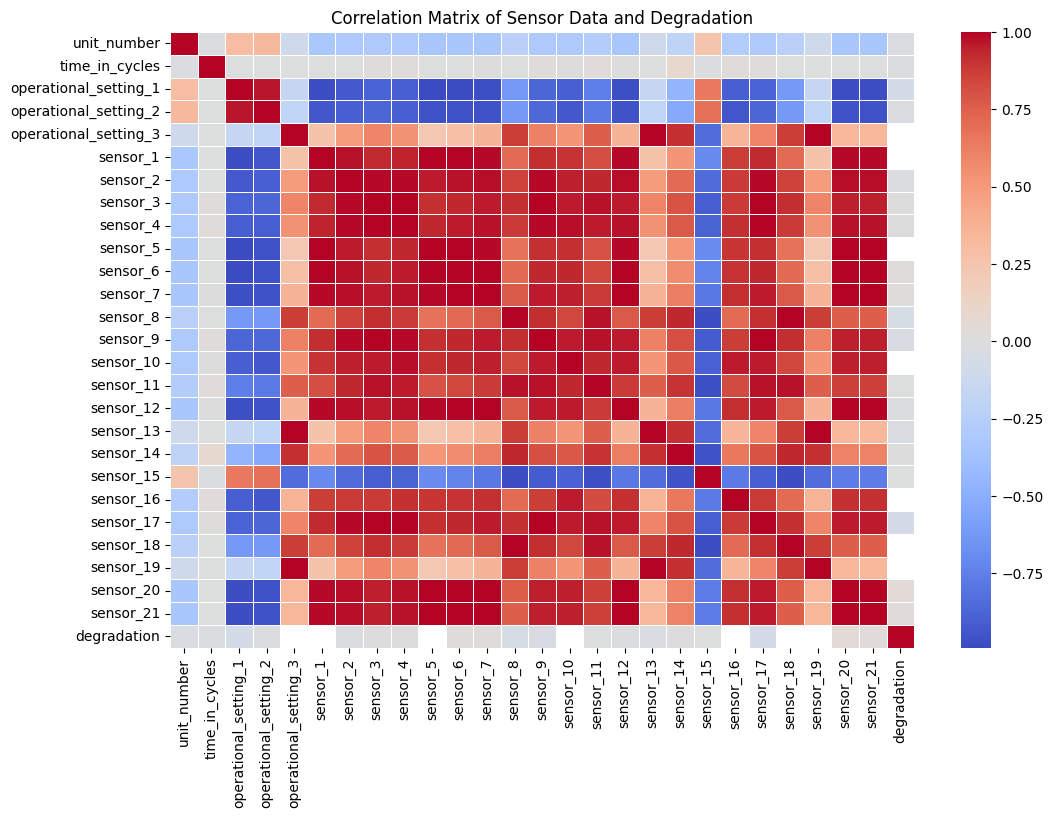

In [19]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sensor Data and Degradation')
plt.show()

In [20]:
# Identify top correlated features with degradation
top_correlated = corr_matrix['degradation'].abs().sort_values(ascending=False)[1:10]
print("\nTop 10 Features Most Correlated with Degradation:")
print(top_correlated)



Top 10 Features Most Correlated with Degradation:
operational_setting_1    0.070013
sensor_17                0.063705
sensor_8                 0.045450
sensor_20                0.036682
sensor_9                 0.031153
sensor_21                0.031110
sensor_13                0.025236
unit_number              0.022279
sensor_2                 0.018662
Name: degradation, dtype: float64


In [43]:
corr_with_target = data.corr()['degradation'].abs().sort_values(ascending=False)
print(corr_with_target.head(10))


degradation               1.000000
cumulative_degradation    0.003714
sensor_6_rolling_mean     0.002292
sensor_5_rolling_mean     0.002285
sensor_2_rolling_mean     0.002284
sensor_7_rolling_mean     0.002284
sensor_12_rolling_mean    0.002283
sensor_17_rolling_mean    0.002278
sensor_21_rolling_mean    0.002271
sensor_20_rolling_mean    0.002271
Name: degradation, dtype: float64


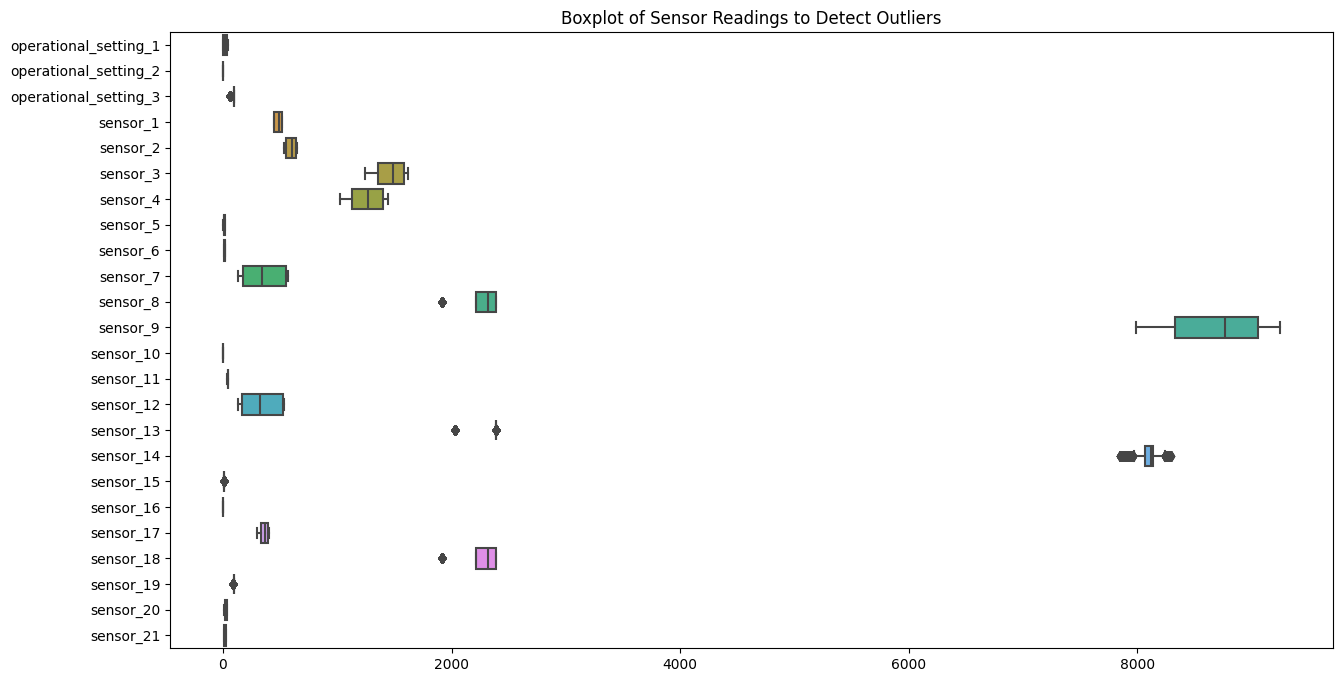

In [21]:
# 4. Detecting anomalies or outliers using boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.drop(columns=['unit_number', 'time_in_cycles', 'degradation']), orient="h")
plt.title('Boxplot of Sensor Readings to Detect Outliers')
plt.show()

C:\Users\RESHMA R B\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


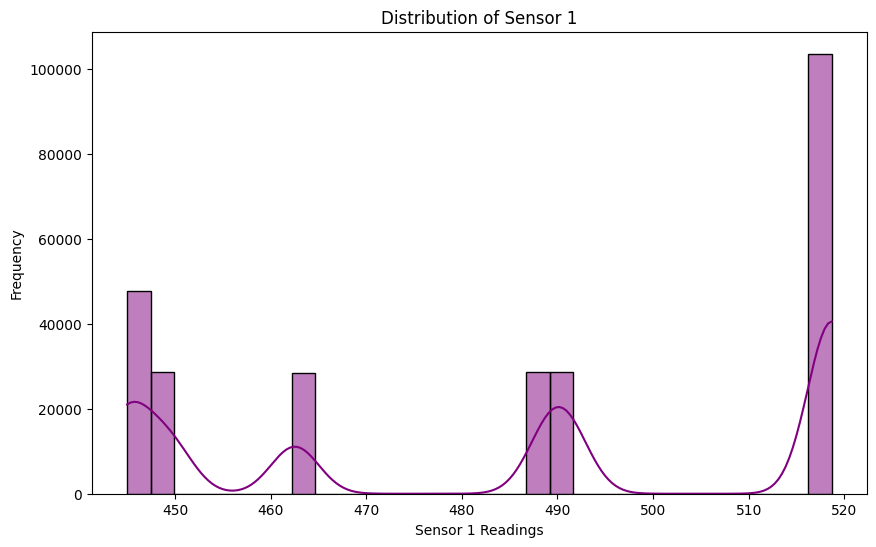

In [42]:
# Sensor Data Distribution (example for sensor_1)
plt.figure(figsize=(10, 6))
sns.histplot(data['sensor_1'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sensor 1')
plt.xlabel('Sensor 1 Readings')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Standardize sensor readings (excluding categorical/integer columns)
sensor_columns = [col for col in data.columns if col.startswith('sensor_')]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[sensor_columns])
data_scaled = pd.DataFrame(data_scaled, columns=sensor_columns)


In [23]:
# Compute Z-score for outlier detection
z_scores = np.abs((data_scaled - data_scaled.mean()) / data_scaled.std())
outliers = (z_scores > 3).sum(axis=1)


In [24]:
# Display rows with detected outliers
outlier_indices = outliers[outliers > 0].index
print(f"\nNumber of outliers detected: {len(outlier_indices)}")
print(data.iloc[outlier_indices])


Number of outliers detected: 1
        unit_number  time_in_cycles  operational_setting_1  \
103034          115             128                25.0001   

        operational_setting_2  operational_setting_3  sensor_1  sensor_2  \
103034                 0.6219                   60.0    462.54    537.14   

        sensor_3  sensor_4  sensor_5  ...  sensor_13  sensor_14  sensor_15  \
103034   1262.09    1061.9      7.05  ...    2027.57    7845.78    10.9836   

        sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  \
103034       0.02        311       1915      84.93      13.98     8.3864   

        degradation  
103034          NaN  

[1 rows x 27 columns]


## Feature Engineering

In [25]:
# Import required libraries

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

In [26]:
# Drop 'unit_number' (it is just an ID)
data.drop(columns=['unit_number'], inplace=True)


In [27]:
### 1. Feature Importance Analysis ###
# Compute correlation with the target variable
corr_with_target = data.corr()['degradation'].abs().sort_values(ascending=False)
print("\nTop Features Correlated with Degradation:\n", corr_with_target)



Top Features Correlated with Degradation:
 degradation              1.000000
operational_setting_1    0.070013
sensor_17                0.063705
sensor_8                 0.045450
sensor_20                0.036682
sensor_9                 0.031153
sensor_21                0.031110
sensor_13                0.025236
sensor_2                 0.018662
sensor_7                 0.017788
operational_setting_2    0.017070
sensor_6                 0.012604
sensor_4                 0.011656
sensor_14                0.007235
time_in_cycles           0.006508
sensor_3                 0.004544
sensor_12                0.004286
sensor_15                0.004089
sensor_11                0.000247
operational_setting_3         NaN
sensor_1                      NaN
sensor_5                      NaN
sensor_10                     NaN
sensor_16                     NaN
sensor_18                     NaN
sensor_19                     NaN
Name: degradation, dtype: float64


In [28]:
# Remove low-variance features
var_thresh = VarianceThreshold(threshold=0.01)  # Removing near-constant features
high_variance_features = var_thresh.fit_transform(data.drop(columns=['degradation']))
selected_features = data.drop(columns=['degradation']).columns[var_thresh.get_support()]

In [29]:
print("\nSelected Features after Variance Thresholding:\n", list(selected_features))


Selected Features after Variance Thresholding:
 ['time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


In [44]:
# Newly Created Features (Examples)
# Cumulative degradation
data['cumulative_degradation'] = data.groupby('unit_number')['degradation'].cumsum()

# Rolling Mean and Standard Deviation for Sensor 1
data['sensor_1_rolling_mean'] = data['sensor_1'].rolling(window=5).mean()
data['sensor_1_rolling_std'] = data['sensor_1'].rolling(window=5).std()

# Ratios and Differences
data['sensor_1_2_ratio'] = data['sensor_1'] / (data['sensor_2'] + 1e-6)
data['sensor_3_4_ratio'] = data['sensor_3'] / (data['sensor_4'] + 1e-6)
data['sensor_5_diff'] = data['sensor_5'] - data['sensor_6']

print("\nList of Engineered Features:\n")
print(data.columns)



List of Engineered Features:

Index(['unit_number', 'time_in_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       ...
       'sensor_17_standardized', 'sensor_17_minmax', 'sensor_18_standardized',
       'sensor_18_minmax', 'sensor_19_standardized', 'sensor_19_minmax',
       'sensor_20_standardized', 'sensor_20_minmax', 'sensor_21_standardized',
       'sensor_21_minmax'],
      dtype='object', length=115)


In [34]:
# Generate cumulative degradation feature
data['cumulative_degradation'] = data.groupby('unit_number')['degradation'].cumsum()

# Display the updated dataset
print(data[['unit_number', 'time_in_cycles', 'degradation', 'cumulative_degradation']].head())

   unit_number  time_in_cycles  degradation  cumulative_degradation
0            1               1         22.0                    22.0
1            1               2         39.0                    61.0
2            1               3        107.0                   168.0
3            1               4         75.0                   243.0
4            1               5        149.0                   392.0


In [35]:
# Rolling statistics (Moving averages & standard deviation for sensor readings)
window_size = 5
sensor_columns = [col for col in data.columns if col.startswith('sensor_')]

for sensor in sensor_columns:
    data[f'{sensor}_rolling_mean'] = data[sensor].rolling(window=window_size, min_periods=1).mean()
    data[f'{sensor}_rolling_std'] = data[sensor].rolling(window=window_size, min_periods=1).std()

In [36]:
# Derived features: Ratio of sensor readings
data['sensor_1_2_ratio'] = data['sensor_1'] / (data['sensor_2'] + 1e-6)  # Adding small value to avoid division by zero
data['sensor_3_4_ratio'] = data['sensor_3'] / (data['sensor_4'] + 1e-6)
data['sensor_5_diff'] = data['sensor_5'] - data['sensor_6']


In [37]:
### 3. Handle Missing Data ###
# Fill missing values with median for numerical data
data.fillna(data.median(), inplace=True)


In [38]:
### 4. Feature Scaling & Normalization ###

# Standardization
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[sensor_columns]), columns=sensor_columns)

In [39]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
data_minmax = pd.DataFrame(minmax_scaler.fit_transform(data[sensor_columns]), columns=sensor_columns)

In [40]:
# Add scaled features back to the dataset
for col in sensor_columns:
    data[f'{col}_standardized'] = data_scaled[col]
    data[f'{col}_minmax'] = data_minmax[col]

# Optional: Drop original sensor columns if needed
# data.drop(columns=sensor_columns, inplace=True)

print("\nFinal Feature Set:\n", data.head())


Final Feature Set:
    unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                 0.0023                 0.0003   
1            1               2                -0.0027                -0.0003   
2            1               3                 0.0003                 0.0001   
3            1               4                 0.0042                 0.0000   
4            1               5                 0.0014                 0.0000   

   operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0                  100.0    518.67    643.02   1585.29   1398.21     14.62   
1                  100.0    518.67    641.71   1588.45   1395.42     14.62   
2                  100.0    518.67    642.46   1586.94   1401.34     14.62   
3                  100.0    518.67    642.44   1584.12   1406.42     14.62   
4                  100.0    518.67    642.51   1587.19   1401.92     14.62   

   ...  sensor_17_standardize

## Model Development and Evaluation 

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Split dataset into features and target
X = data.drop(columns=['degradation'])
y = data['degradation']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for models that require it (like Neural Networks and XGBoost/LightGBM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Linear Regression (Baseline Model) ###
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Model Evaluation:")
print(f"RMSE: {rmse_lr}")
print(f"MAE: {mae_lr}")
print(f"R²: {r2_lr}")

### 2. Gradient Boosting - XGBoost ###
# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation metrics for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Model Evaluation:")
print(f"RMSE: {rmse_xgb}")
print(f"MAE: {mae_xgb}")
print(f"R²: {r2_xgb}")

### 3. Gradient Boosting - LightGBM ###
# Initialize and train LightGBM model
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluation metrics for LightGBM
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("\nLightGBM Model Evaluation:")
print(f"RMSE: {rmse_lgb}")
print(f"MAE: {mae_lgb}")
print(f"R²: {r2_lgb}")

### 4. Neural Networks ###
# Initialize and train Neural Network (MLPRegressor)
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluation metrics for Neural Networks
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("\nNeural Network Model Evaluation:")
print(f"RMSE: {rmse_nn}")
print(f"MAE: {mae_nn}")
print(f"R²: {r2_nn}")



Linear Regression Model Evaluation:
RMSE: 2.4391139833018034
MAE: 0.12796128938697945
R²: -0.0012096047740615123

XGBoost Model Evaluation:
RMSE: 2.5581541681714413
MAE: 0.16964461578194268
R²: -0.1013218178639026


C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM Model Evaluation:
RMSE: 2.447330330714757
MAE: 0.1054359868132887
R²: -0.007966272521640061

Neural Network Model Evaluation:
RMSE: 2.569559390362253
MAE: 0.7126228205711016
R²: -0.11116393030923821


In [45]:
# Comparison of Models' RMSE, MAE, R²
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost', 'LightGBM', 'Neural Network'],
    'RMSE': [rmse_lr, rmse_xgb, rmse_lgb, rmse_nn],
    'MAE': [mae_lr, mae_xgb, mae_lgb, mae_nn],
    'R²': [r2_lr, r2_xgb, r2_lgb, r2_nn]
})
print(model_comparison)


               Model      RMSE       MAE        R²
0  Linear Regression  2.439114  0.127961 -0.001210
1            XGBoost  2.558154  0.169645 -0.101322
2           LightGBM  2.447330  0.105436 -0.007966
3     Neural Network  2.569559  0.712623 -0.111164


In [47]:
# Print the results for the best model (Linear Regression)
print("\nBest Model: Linear Regression")
print(f"RMSE: {rmse_lr:.4f}")  # Formatting to 4 decimal places
print(f"MAE: {mae_lr:.4f}")
print(f"R²: {r2_lr:.4f}")


Best Model: Linear Regression
RMSE: 2.4391
MAE: 0.1280
R²: -0.0012
